In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cluster_blobs.csv")
moons = pd.read_csv("cluster_moons.csv")
circles = pd.read_csv("cluster_circles.csv")
df

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


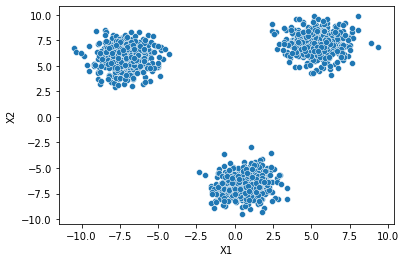

In [4]:
sns.scatterplot(x="X1", y = "X2", data=df)

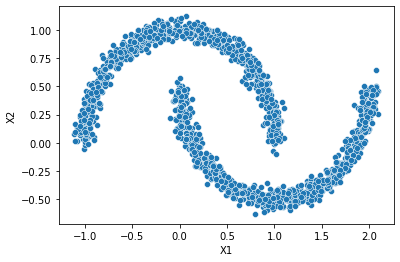

In [8]:
sns.scatterplot(x="X1", y = "X2", data=moons)

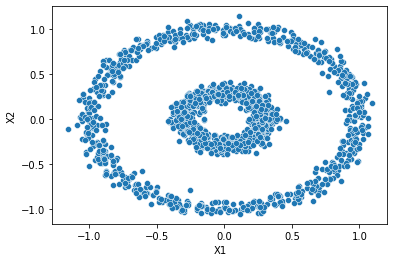

In [13]:
sns.scatterplot(x="X1", y = "X2", data=circles)

In [14]:
def display_cat(model, data):
  label = model.fit_predict(data)
  sns.scatterplot(x="X1", y = "X2", data=data, hue=label, palette="Set1")

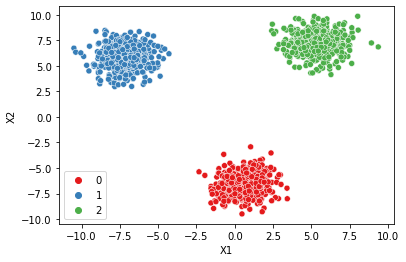

In [19]:
from sklearn.cluster import KMeans
display_cat(KMeans(3), df)

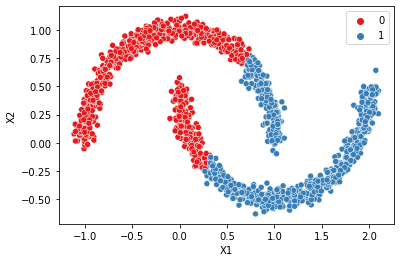

In [20]:
display_cat(KMeans(2), moons)

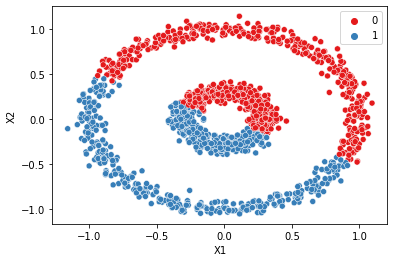

In [21]:
display_cat(KMeans(2), circles)

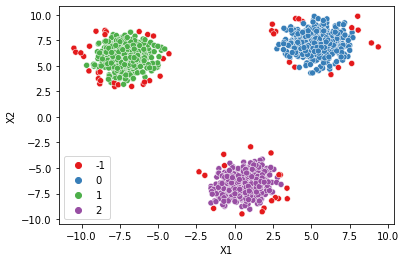

In [22]:
from sklearn.cluster import DBSCAN
display_cat(DBSCAN(), df)

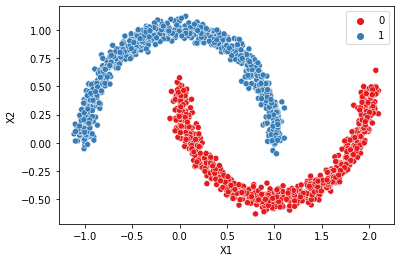

In [26]:
display_cat(DBSCAN(eps=0.15), moons)

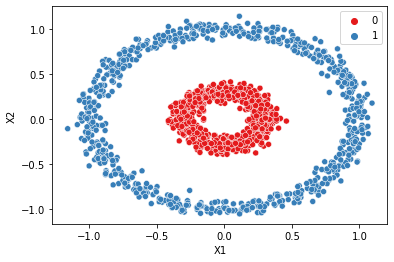

In [27]:
display_cat(DBSCAN(eps=0.15), circles)

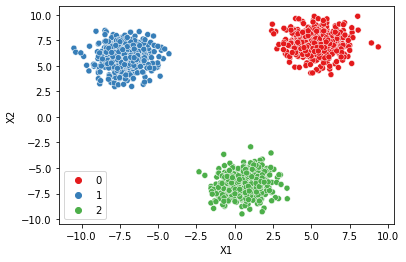

In [36]:
display_cat(DBSCAN(eps=1.5), df)

(0.0, 1.0)

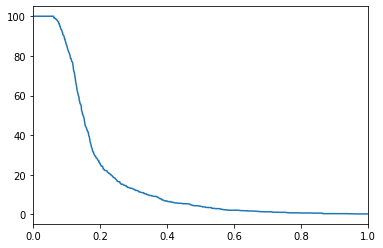

In [41]:
outlier_per = []
num_outliers = []
for eps in np.linspace(0.001, 1, 1000):
  model = DBSCAN(eps=eps)
  model.fit(df)
  num_outliers.append(np.sum(model.labels_ == -1))
  outlier_per.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))

sns.lineplot(x = np.linspace(0.001, 1, 1000), y = outlier_per)
plt.xlim(0,1)